In [20]:
import pandas as pd
import numpy as np
import scanpy as sc
import pickle as pkl

import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=100, facecolor='white')

scanpy==1.7.2 anndata==0.7.8 umap==0.5.3 numpy==1.19.5 scipy==1.5.3 pandas==1.1.5 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6


In [3]:
path = "/home/unix/sjohri/valab_sjohri/projects/github_code/beanie-analysis/"

In [4]:
adata1 = sc.read_10x_h5(path+"/data/brca/bassez_2021/1863-counts_cells_cohort1.h5")
adata1.obs = pd.read_csv(path+"/data/brca/bassez_2021/raw_data/1872-BIOKEY_metaData_cohort1_web.csv", index_col=0)
adata1

reading /home/unix/sjohri/valab_sjohri/projects/github_code/beanie-analysis//data/brca/bassez_2021/1863-counts_cells_cohort1.h5
 (0:00:15)


AnnData object with n_obs × n_vars = 175942 × 25288
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient_id', 'timepoint', 'expansion', 'BC_type', 'cellType', 'cohort'
    var: 'gene_ids'

In [5]:
adata_concat = adata1[(adata1.obs.cellType=="Cancer_cell") & (adata1.obs.BC_type=="TNBC")]
adata_concat

View of AnnData object with n_obs × n_vars = 25389 × 25288
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient_id', 'timepoint', 'expansion', 'BC_type', 'cellType', 'cohort'
    var: 'gene_ids'

In [6]:
adata_concat.obs["group_id"] = "NA"
adata_concat.obs.group_id = adata_concat.obs.timepoint.map({"Pre":"treatment_naive","On":"anti_PD1"})
adata_concat.obs["sample_id"] = "NA"
adata_concat.obs.sample_id = adata_concat.obs.patient_id + "_" + adata_concat.obs.BC_type + "_" + adata_concat.obs.group_id
adata_concat

Trying to set attribute `.obs` of view, copying.


AnnData object with n_obs × n_vars = 25389 × 25288
    obs: 'nCount_RNA', 'nFeature_RNA', 'patient_id', 'timepoint', 'expansion', 'BC_type', 'cellType', 'cohort', 'group_id', 'sample_id'
    var: 'gene_ids'

In [7]:
adata_concat.obs

,nCount_RNA,nFeature_RNA,patient_id,timepoint,expansion,BC_type,cellType,cohort,group_id,sample_id
Cell,,,,,,,,,,
BIOKEY_10_Pre_AAACCTGCAATGGAGC-1,431,332,BIOKEY_10,Pre,E,TNBC,Cancer_cell,treatment_naive,treatment_naive,BIOKEY_10_TNBC_treatment_naive
BIOKEY_10_Pre_AAACCTGGTACTCAAC-1,758,471,BIOKEY_10,Pre,E,TNBC,Cancer_cell,treatment_naive,treatment_naive,BIOKEY_10_TNBC_treatment_naive
BIOKEY_10_Pre_AAACCTGGTCAGAGGT-1,990,584,BIOKEY_10,Pre,E,TNBC,Cancer_cell,treatment_naive,treatment_naive,BIOKEY_10_TNBC_treatment_naive
BIOKEY_10_Pre_AAACCTGGTCCCTTGT-1,530,386,BIOKEY_10,Pre,E,TNBC,Cancer_cell,treatment_naive,treatment_naive,BIOKEY_10_TNBC_treatment_naive
BIOKEY_10_Pre_AAACCTGTCTGGGCCA-1,415,333,BIOKEY_10,Pre,E,TNBC,Cancer_cell,treatment_naive,treatment_naive,BIOKEY_10_TNBC_treatment_naive
...,...,...,...,...,...,...,...,...,...,...
BIOKEY_2_On_TTTGGTTCACACATGT-1,693,314,BIOKEY_2,On,NE,TNBC,Cancer_cell,treatment_naive,anti_PD1,BIOKEY_2_TNBC_anti_PD1
BIOKEY_2_On_TTTGGTTCACTCTGTC-1,12794,4304,BIOKEY_2,On,NE,TNBC,Cancer_cell,treatment_naive,anti_PD1,BIOKEY_2_TNBC_anti_PD1
BIOKEY_2_On_TTTGGTTGTCAACTGT-1,1104,715,BIOKEY_2,On,NE,TNBC,Cancer_cell,treatment_naive,anti_PD1,BIOKEY_2_TNBC_anti_PD1


In [8]:
adata_concat.obs.group_id.value_counts()

treatment_naive    13080
anti_PD1           12309
Name: group_id, dtype: int64

In [9]:
adata_concat.obs.sample_id.value_counts()

BIOKEY_26_TNBC_anti_PD1           5401
BIOKEY_10_TNBC_treatment_naive    2583
BIOKEY_31_TNBC_treatment_naive    2247
BIOKEY_9_TNBC_treatment_naive     2059
BIOKEY_26_TNBC_treatment_naive    1467
BIOKEY_16_TNBC_anti_PD1           1380
BIOKEY_15_TNBC_treatment_naive    1200
BIOKEY_31_TNBC_anti_PD1           1065
BIOKEY_1_TNBC_anti_PD1             991
BIOKEY_1_TNBC_treatment_naive      857
BIOKEY_19_TNBC_anti_PD1            774
BIOKEY_19_TNBC_treatment_naive     643
BIOKEY_2_TNBC_treatment_naive      576
BIOKEY_11_TNBC_treatment_naive     567
BIOKEY_10_TNBC_anti_PD1            556
BIOKEY_15_TNBC_anti_PD1            536
BIOKEY_2_TNBC_anti_PD1             474
BIOKEY_16_TNBC_treatment_naive     457
BIOKEY_14_TNBC_treatment_naive     334
BIOKEY_14_TNBC_anti_PD1            332
BIOKEY_11_TNBC_anti_PD1            259
BIOKEY_9_TNBC_anti_PD1             254
BIOKEY_8_TNBC_anti_PD1             251
BIOKEY_25_TNBC_treatment_naive      65
BIOKEY_25_TNBC_anti_PD1             36
BIOKEY_8_TNBC_treatment_n

In [10]:
#Normalize gene counts
sc.pp.normalize_total(adata_concat, target_sum=1e6)

# Logarithmize the data.
sc.pp.log1p(adata_concat)

#Store raw data, for finding markers in each cluster and other analysis
adata_concat.raw = adata_concat

normalizing counts per cell
    finished (0:00:00)


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


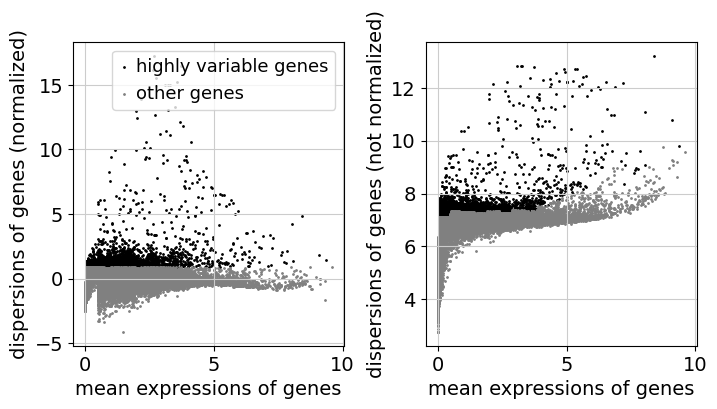

Highly variable genes: 3000


In [11]:
#variable genes for the full dataset
sc.pp.highly_variable_genes(adata_concat, n_top_genes=3000)
sc.pl.highly_variable_genes(adata_concat)

print("Highly variable genes: %d"%sum(adata_concat.var.highly_variable))
var_genes_all = adata_concat.var.highly_variable
adata_concat = adata_concat[:,var_genes_all]

In [12]:
sc.pp.scale(adata_concat, max_value=10)

/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
    on highly variable genes
    with n_comps=100
    finished (0:00:22)


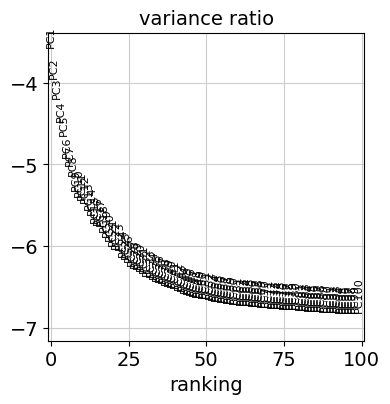

In [13]:
# Set seed
import random
initialization = 3120
random.seed(initialization)

sc.pp.pca(adata_concat, random_state=initialization, svd_solver='arpack', n_comps=100)
sc.pl.pca_variance_ratio(adata_concat, n_pcs= 100, log=True, show = True)
# sc.pl.pca_overview(adata_concat,color="n_genes")

In [14]:
sc.external.pp.harmony_integrate(adata_concat, key=["sample_id"],
                                 random_state=initialization, max_iter_harmony=50)
adata_concat.obsm['X_pca'] = adata_concat.obsm['X_pca_harmony']

2024-11-13 15:49:13,617 - harmonypy - INFO - Iteration 1 of 50
2024-11-13 15:49:30,758 - harmonypy - INFO - Iteration 2 of 50
2024-11-13 15:49:47,607 - harmonypy - INFO - Converged after 2 iterations


In [15]:
npc = 100
sc.pp.neighbors(adata_concat, random_state=initialization, n_neighbors=500, n_pcs=npc)
sc.tl.leiden(adata_concat, random_state=initialization, resolution=0.2)
sc.tl.umap(adata_concat, random_state=initialization, min_dist=0.2)

computing neighbors
    using 'X_pca' with n_pcs = 100
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:25:44)
running Leiden clustering
    finished: found 6 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:01:56)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:19)


... storing 'patient_id' as categorical
... storing 'timepoint' as categorical
... storing 'expansion' as categorical
... storing 'BC_type' as categorical
... storing 'cellType' as categorical
... storing 'cohort' as categorical
... storing 'group_id' as categorical
... storing 'sample_id' as categorical


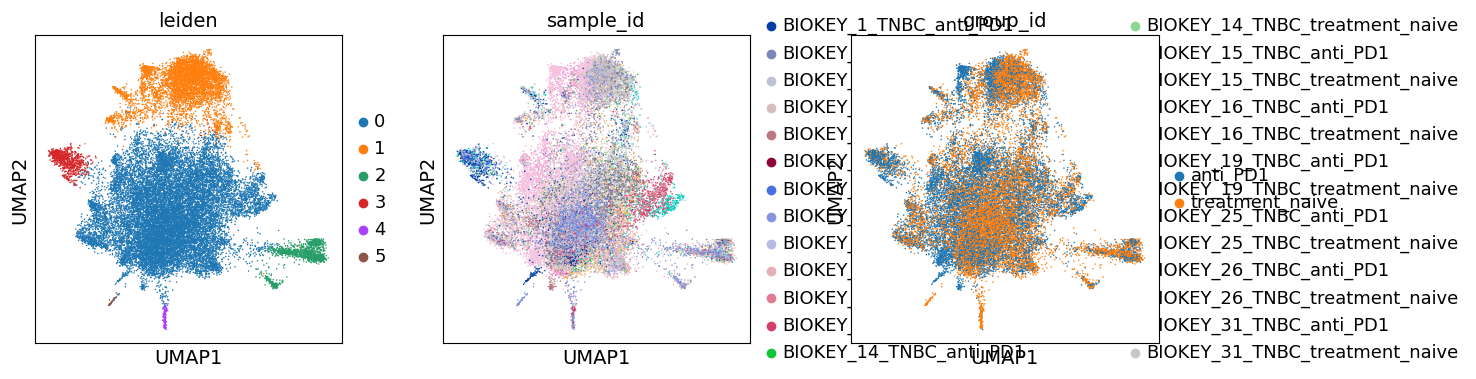

In [16]:
sc.pl.umap(adata_concat, color=['leiden', 'sample_id', 'group_id'], show = True)

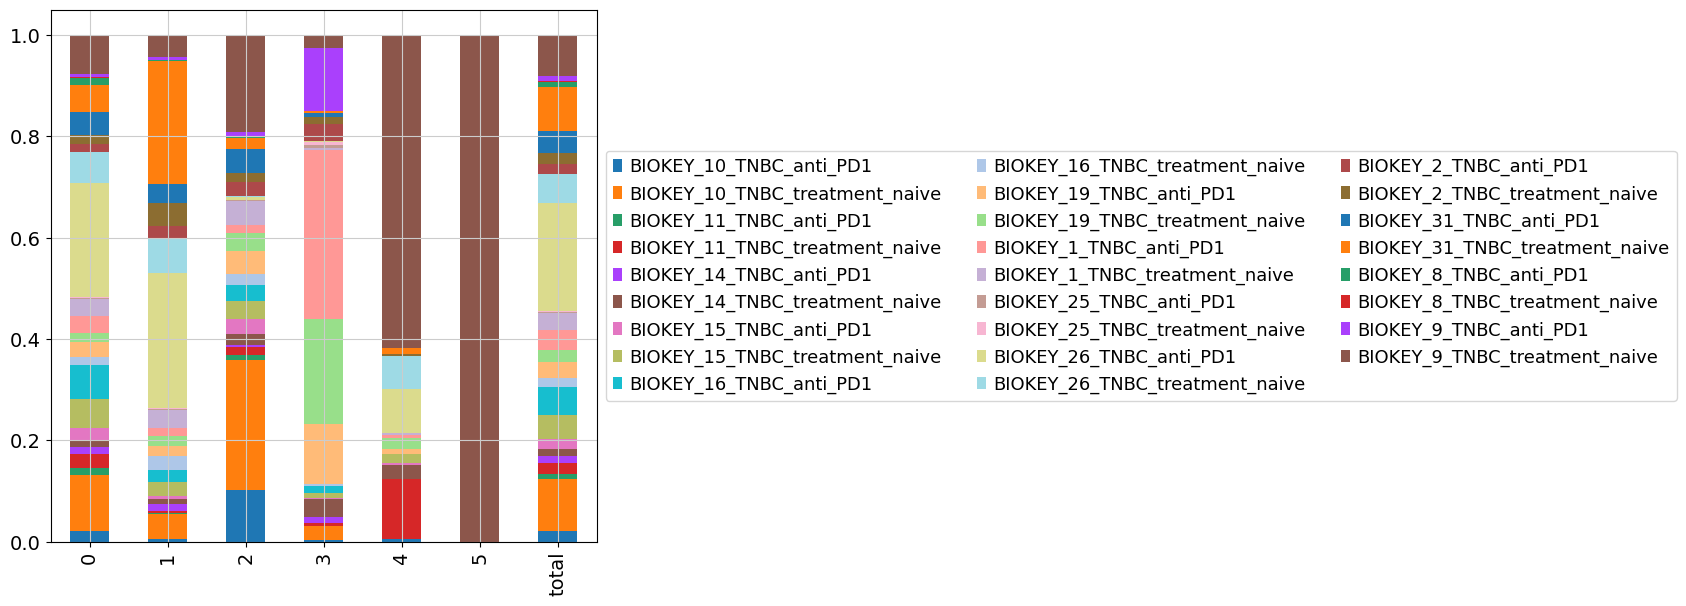

In [17]:
leiden_prop = dict()
no_clusters = len(adata_concat.obs['leiden'].unique())
for sn in adata_concat.obs['sample_id'].unique():
    temp = adata_concat[adata_concat.obs['sample_id'] == sn,:]
    cell_count = temp.obs['leiden'].value_counts()
    cell_count = cell_count.sort_index()
    cell_count = cell_count.to_dict()
    cell_count = [cell_count[str(x)] if str(x) in cell_count.keys() else 0 for x in range(0,no_clusters)]
    leiden_prop[sn] = cell_count
    
leiden_prop = pd.DataFrame(leiden_prop).T

leiden_prop['total'] = leiden_prop.sum(axis = 1)
leiden_prct = pd.DataFrame()
for x in leiden_prop.columns:
    leiden_prct[x] = leiden_prop[x]/leiden_prop[x].sum()
leiden_prct = leiden_prct.sort_index()

leiden_prct.T.plot.bar(stacked=True, legend = False,figsize=(7,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol = 3)

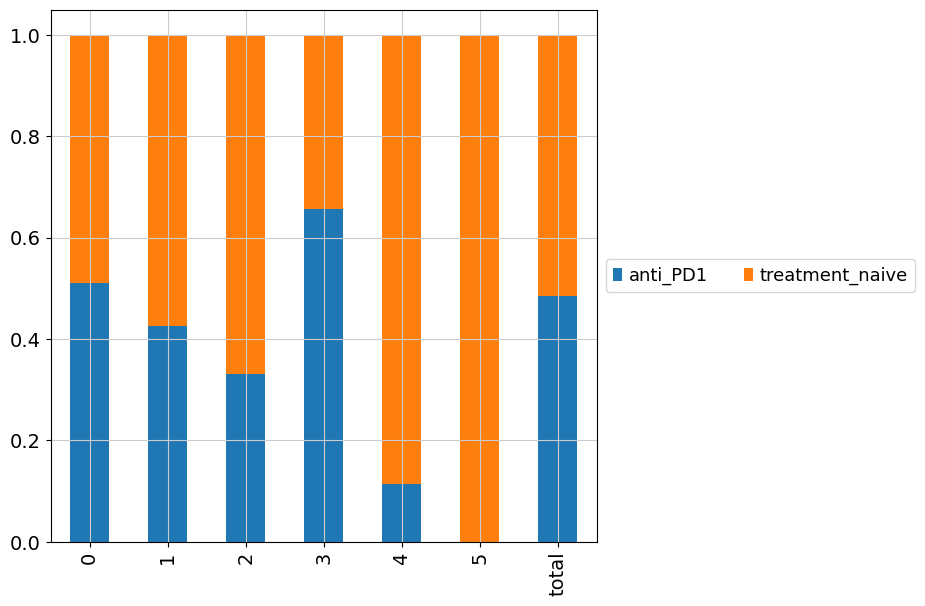

In [18]:
leiden_prop = dict()
no_clusters = len(adata_concat.obs['leiden'].unique())
for sn in adata_concat.obs['group_id'].unique():
    temp = adata_concat[adata_concat.obs['group_id'] == sn,:]
    cell_count = temp.obs['leiden'].value_counts()
    cell_count = cell_count.sort_index()
    cell_count = cell_count.to_dict()
    cell_count = [cell_count[str(x)] if str(x) in cell_count.keys() else 0 for x in range(0,no_clusters)]
    leiden_prop[sn] = cell_count
    
leiden_prop = pd.DataFrame(leiden_prop).T

leiden_prop['total'] = leiden_prop.sum(axis = 1)
leiden_prct = pd.DataFrame()
for x in leiden_prop.columns:
    leiden_prct[x] = leiden_prop[x]/leiden_prop[x].sum()
leiden_prct = leiden_prct.sort_index()

leiden_prct.T.plot.bar(stacked=True, legend = False,figsize=(7,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol = 3)

In [19]:
sc.tl.rank_genes_groups(adata_concat, 'leiden', method='wilcoxon', corr_method="benjamini-hochberg")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:50)


In [21]:
adata_concat.write_h5ad("./inputs/analysis_2/adata_full.h5ad")

In [22]:
dmap_brca = pkl.load(open("brca_sampleid_map.pkl","rb"))
adata_concat.obs.sample_id = adata_concat.obs.sample_id.map(dmap_brca)

cluster_ids = sorted(set(adata_concat.obs.leiden))
for idx in cluster_ids:
    # save non log-normalized counts (set normalized=False in BEANIE)
    adata1[adata_concat[adata_concat.obs.leiden==idx].obs.index,].write_h5ad(f"./inputs/analysis_2/ts{int(idx)+1}_adata.h5ad")
    adata_concat[adata_concat.obs.leiden==idx].obs[["sample_id","group_id"]].to_csv(f"./inputs/analysis_2/ts{int(idx)+1}_metad.csv")

/home/unix/sjohri/valab_sjohri/envs/beanie_revisions/lib/python3.6/site-packages/anndata/_core/anndata.py:1229: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'patient_id' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'timepoint' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'expansion' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'BC_type' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cellType' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cohort' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'patient_id' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'timepoint' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'expans